In [1]:
#!pip install xgboost

Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

**Importing Dataset**

The data set which we are using for this Notebook, is the carbon-dioxide emission generated from burning coal to produce electricity power in United States of America between 1973 and 2016.
Our target is to predict the carbon-dioxide emission for next years, using XGBOOST.

In [3]:
#Read the dataset and print the top 5 elements of the dataset
data = pd.read_csv('../input/co2-dataset-in-usa/co2.csv')
data.head()

,YYYYMM,Value
0,197301,72.076
1,197302,64.442
2,197303,64.084
3,197304,60.842
4,197305,61.798


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YYYYMM  523 non-null    int64  
 1   Value   523 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.3 KB


In [5]:
data.info

<bound method DataFrame.info of      YYYYMM    Value
0    197301   72.076
1    197302   64.442
2    197303   64.084
3    197304   60.842
4    197305   61.798
..      ...      ...
518  201603   72.840
519  201604   71.410
520  201605   82.510
521  201606  115.772
522  201607  135.958

[523 rows x 2 columns]>

As we see the first column contains "YYYYMM" data, it is better to seperate them into 2 columns

In [6]:
data['Month'] = data.YYYYMM.astype(str).str[4:6].astype(int)
data['Year'] = data.YYYYMM.astype(str).str[0:4].astype(int)

In [7]:
data.head()

,YYYYMM,Value,Month,Year
0,197301,72.076,1,1973
1,197302,64.442,2,1973
2,197303,64.084,3,1973
3,197304,60.842,4,1973
4,197305,61.798,5,1973


In [8]:
data.shape

(523, 4)

**Checking null values**

In [9]:
data.isnull().sum()

YYYYMM    0
Value     0
Month     0
Year      0
dtype: int64

In [10]:
data.drop(['YYYYMM'], axis = 1, inplace = True)

In [11]:
data.tail(10)

,Value,Month,Year
513,98.469,10,2015
514,90.263,11,2015
515,91.658,12,2015
516,113.495,1,2016
517,92.416,2,2016
518,72.840,3,2016
519,71.410,4,2016
520,82.510,5,2016
521,115.772,6,2016
522,135.958,7,2016


In [12]:
np.isinf(data).sum()

Value    0
Month    0
Year     0
dtype: int64

In [13]:
np.isnan(data).sum()

Value    0
Month    0
Year     0
dtype: int64

As you see above, we checked if there is any 'NAN' value or 'INFINITE' value .
There is no such a value

In [14]:
X = data.loc[:,['Month', 'Year']].values
y = data.loc[:,'Value'].values

In [15]:
data_dmatrix = xgb.DMatrix(X,label=y)

In [16]:
data_dmatrix

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(418, 2)
(418,)
(105, 2)
(105,)


In [18]:
reg_mod = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.08,
    subsample=0.75,
    colsample_bytree=1, 
    max_depth=7,
    gamma=0,
)
reg_mod.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.08, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [19]:
#After training the model, we'll check the model training score.
scores = cross_val_score(reg_mod, X_train, y_train,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.98


In [20]:
predictions = reg_mod.predict(X_test)

In [21]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE: %f" % (rmse))

RMSE: 4.263376


In [22]:
r2 = np.sqrt(r2_score(y_test, predictions))
print("R_Squared Score : %f" % (r2))

R_Squared Score : 0.990117


As you can see, the these statistical metrics have reinstated our confidence about this model. 
'RMSE' ~ 4.95 and 'R-Squared Score' ~ 98.8% 
Let's visualize the original data set.

<AxesSubplot:xlabel='Year', ylabel='Value'>

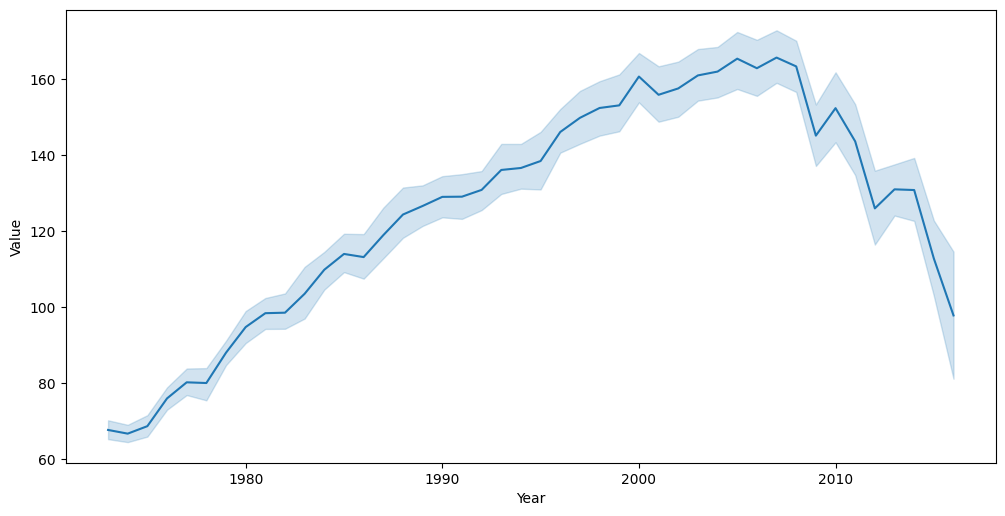

In [23]:
plt.figure(figsize=(12, 6), dpi=100)
sns.lineplot(x='Year', y='Value', data=data)

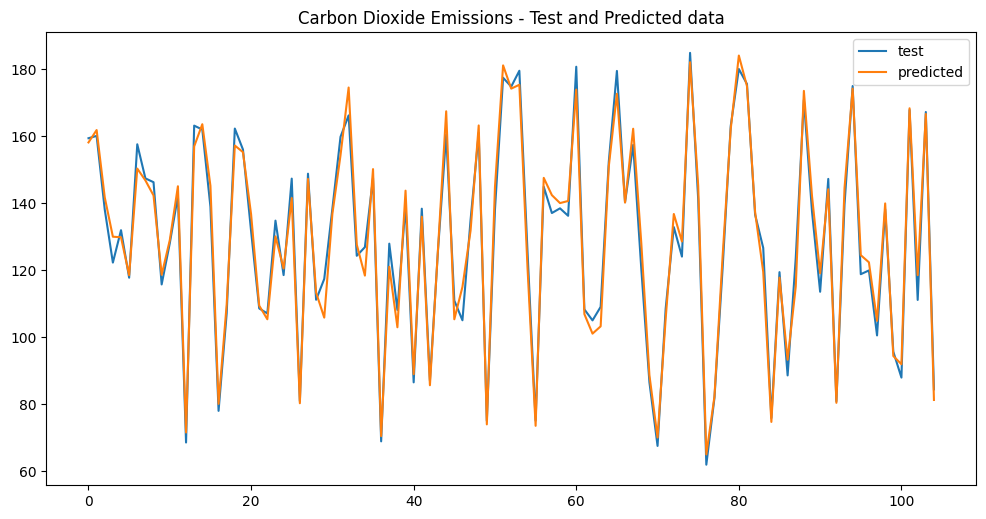

In [24]:
plt.figure(figsize=(12, 6), dpi=100)
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="test")
plt.plot(x_ax, predictions, label="predicted")
plt.title("Carbon Dioxide Emissions - Test and Predicted data")
plt.legend()
plt.show()

Finally, the last piece of code will print the forecasted carbon dioxide emissions until 2025.

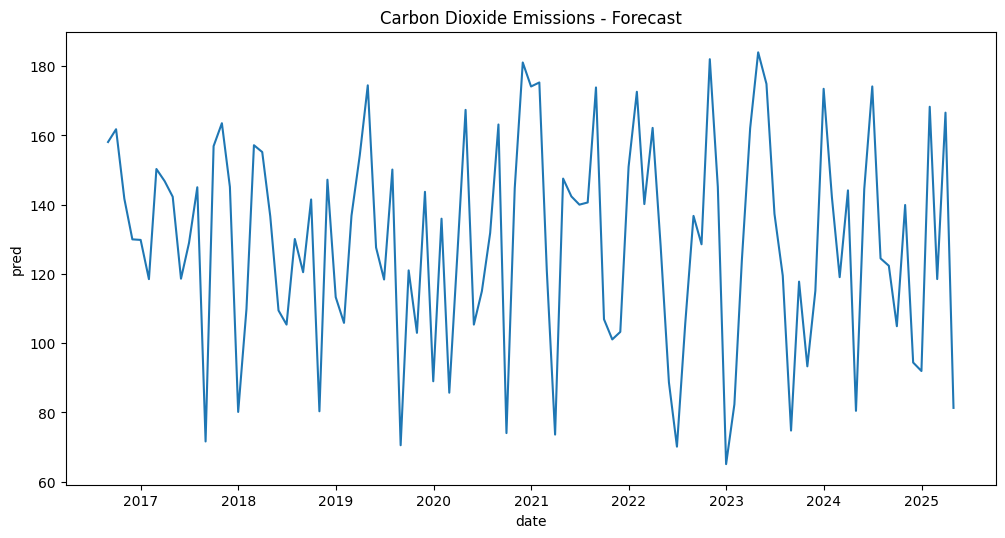

In [25]:
plt.figure(figsize=(12, 6), dpi=100)
df=pd.DataFrame(predictions, columns=['pred']) 
df['date'] = pd.date_range(start='8/1/2016', periods=len(df), freq='M')
sns.lineplot(x='date', y='pred', data=df)
plt.title("Carbon Dioxide Emissions - Forecast")
plt.show()

In [26]:
df

,pred,date
0,158.108276,2016-08-31
1,161.797379,2016-09-30
2,141.717712,2016-10-31
3,129.997360,2016-11-30
4,129.835510,2016-12-31
...,...,...
100,91.975136,2024-12-31
101,168.288986,2025-01-31
102,118.527374,2025-02-28
103,166.587540,2025-03-31
